In [1]:
# %local-changes

In [2]:
import sys
sys.path.append('../src')

📊 Model Parameters from API Configuration:
   Small Network: [128, 128] → 0.034M params
   Medium Network: [1024, 1024] → 2.109M params
   Large Network: [2048, 2048] → 8.413M params
🔥 Generating Performance Analysis...

📈 Creating Reference Model Curves (Small/Medium/Large)...
📊 Graph 1 - Reference Curves: Using noise_scale=API_DEFAULT
Calculating reference curves for training_ne using API function...
🎛️  Noise parameter: USING API DEFAULT
Day 6.0: Small=0.6132, Medium=0.6319, Large=0.6534
Day 7.0: Small=0.5989, Medium=0.6016, Large=0.6189
Day 8.0: Small=0.6130, Medium=0.6343, Large=0.6559
Day 9.0: Small=0.5866, Medium=0.6111, Large=0.6551
Day 10.0: Small=0.5890, Medium=0.5959, Large=0.6364


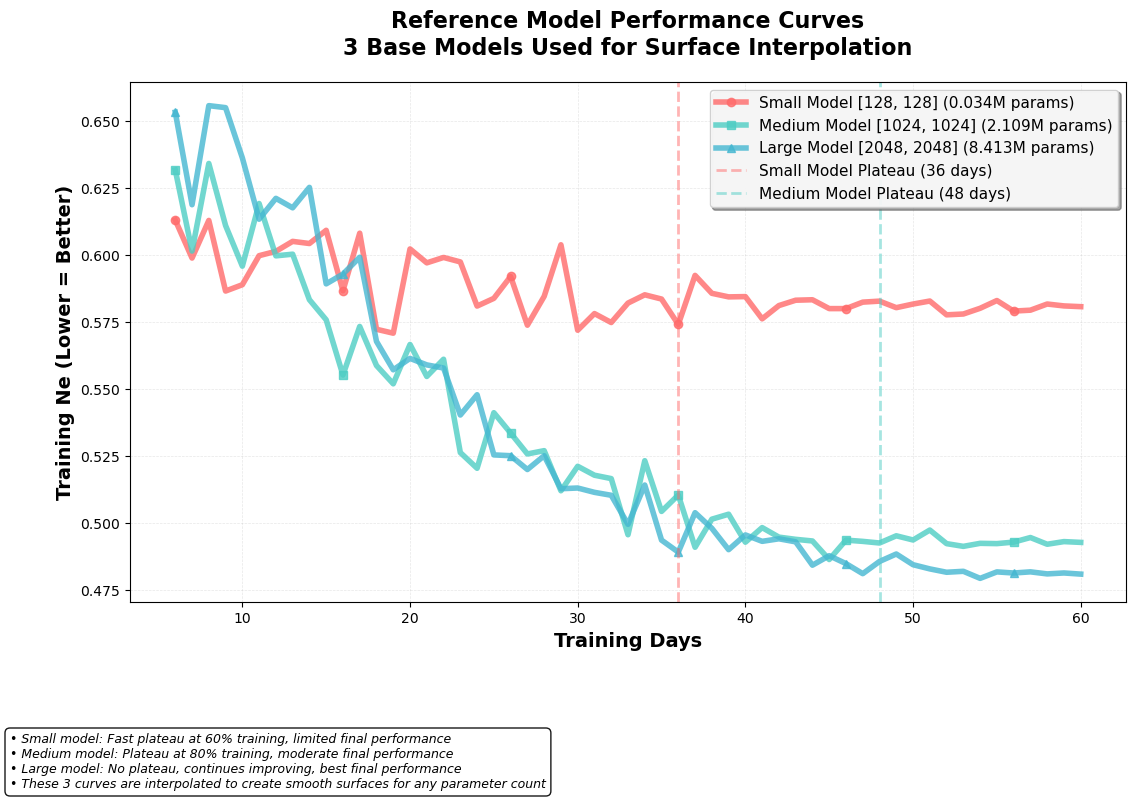


📐 Creating Clean Reference Model Curves (NO NOISE)...
📊 Graph - Clean Curves: Using noise_scale=0.0 (PURE MATHEMATICAL FUNCTIONS)
Calculating reference curves for training_ne using API function...
🎛️  Noise parameter: SMOOTH (noise_scale=0)
🎛️  Overriding API default noise scale with: 0.0
Day 6.0: Small=0.6092, Medium=0.6231, Large=0.6464
Day 7.0: Small=0.6079, Medium=0.6200, Large=0.6425
Day 8.0: Small=0.6064, Medium=0.6166, Large=0.6383
Day 9.0: Small=0.6049, Medium=0.6130, Large=0.6337
Day 10.0: Small=0.6033, Medium=0.6090, Large=0.6288


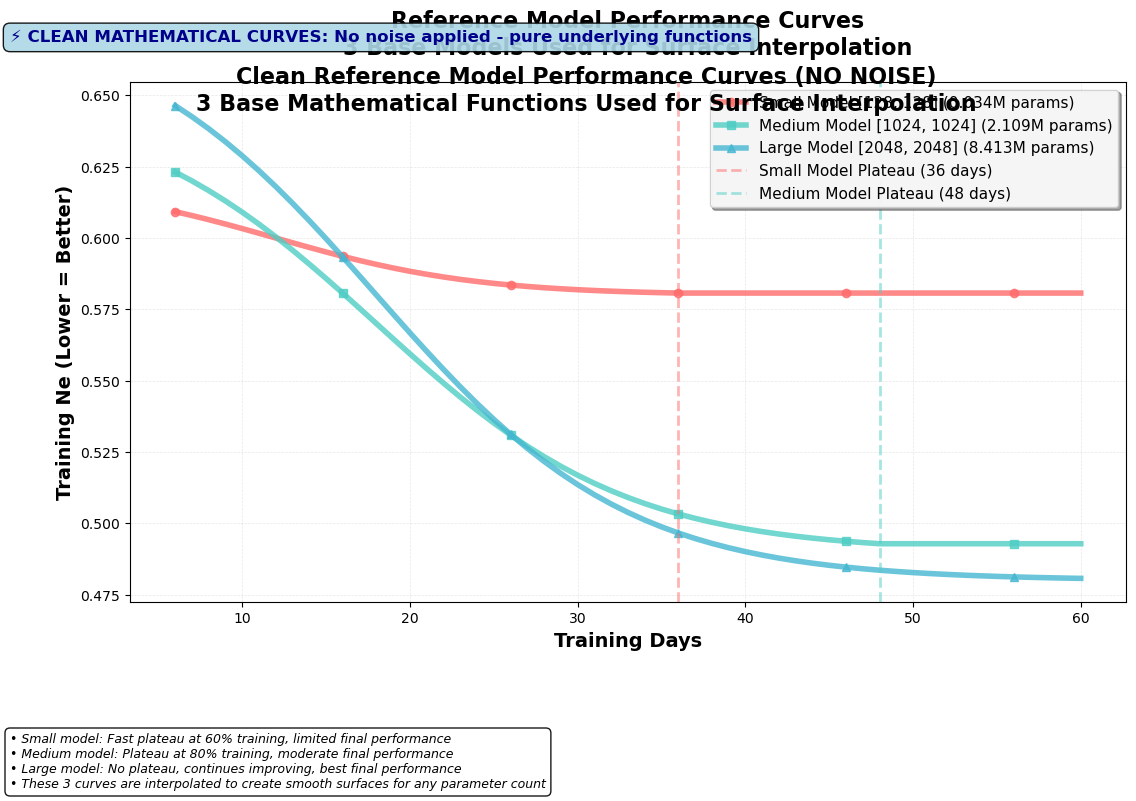


⚡ Creating 3D Surface Plot for QPS...
📊 Graph 3 - 3D QPS Surface: Using noise_scale=API_DEFAULT
Calculating 3D surface for qps using API function...
🎛️  Noise parameter: None
🎛️  Using API default noise scale: 0.02


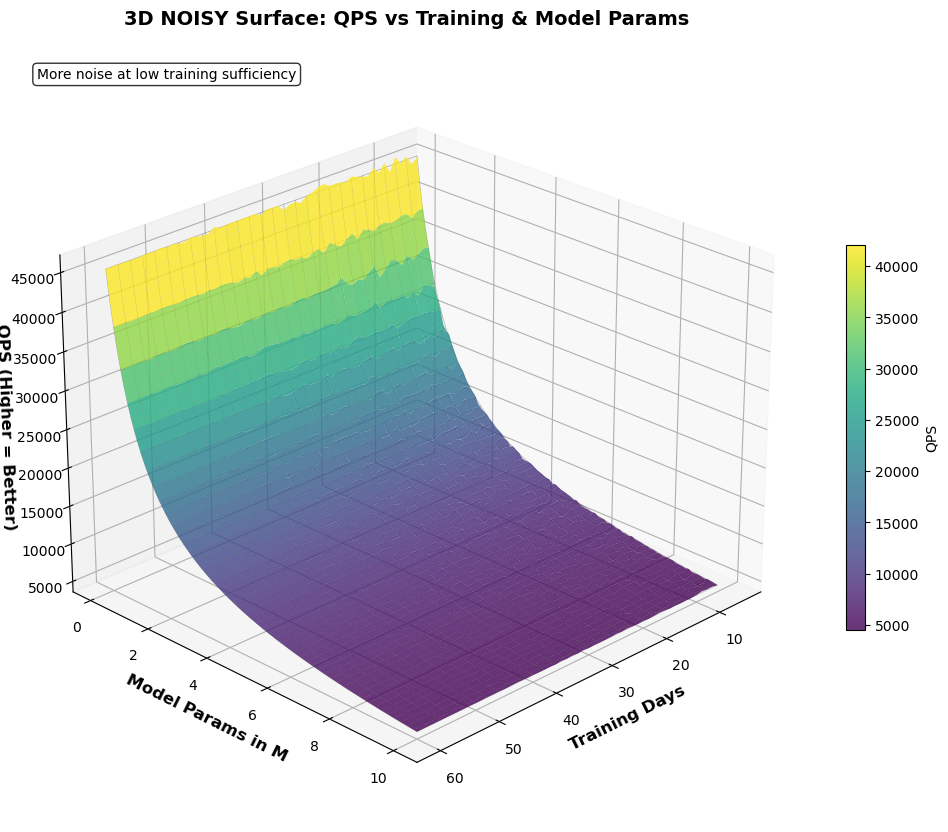


🎲 Creating 3D Surface Plot for Training NE...
📊 Graph 2 - 3D Training NE Surface: Using noise_scale=API_DEFAULT
Calculating 3D surface for training_ne using API function...
🎛️  Noise parameter: None
🎛️  Using API default noise scale: 0.02


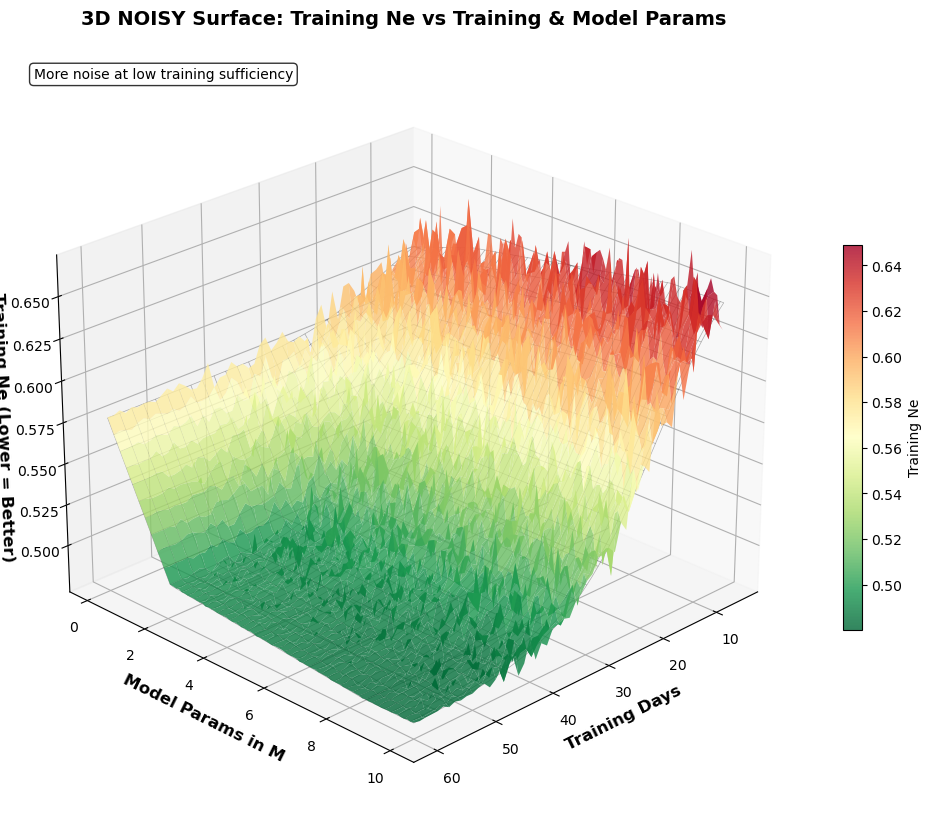


🎯 Creating Clean 3D Surface Plot for TRAINING_NE (NO NOISE)...
📊 Clean Training NE Surface: Using noise_scale=0.0 (PURE MATHEMATICAL SURFACE)
Calculating 3D surface for training_ne using API function...
🎛️  Noise parameter: 0.0
🎛️  Overriding API default noise scale with: 0.0


/opt/conda/envs/rapids/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


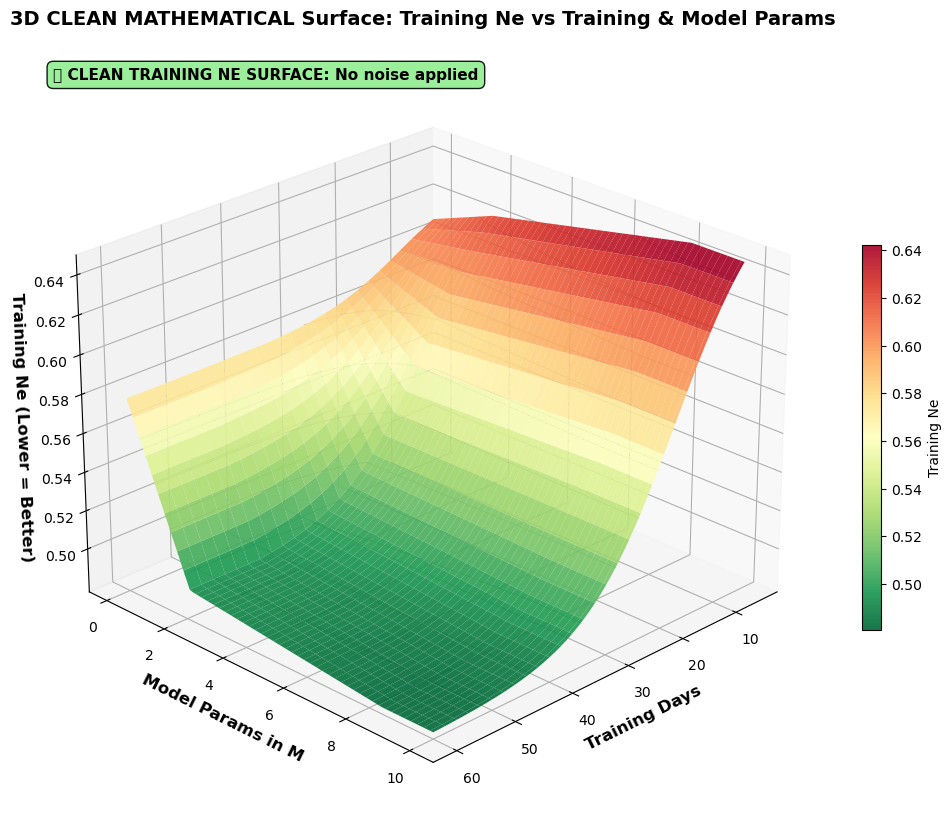


✅ All visualizations complete!

🔍 Key Observations:
• Reference Curves:
  - Small model plateaus early but has limited performance
  - Medium model plateaus later with moderate performance
  - Large model continues improving with best final performance
  - These 3 curves are interpolated for any parameter count
• Eval NE Surface:
  - Smooth base surface (black wireframe) shows interpolated performance
  - Colored surface adds realistic noise on top of smooth base
  - Noise is more pronounced at low training sufficiency
  - Lower values (green) are better performance
• QPS Surface:
  - Shows queries per second capability across model sizes
  - Smaller models have higher QPS (less computational cost)
  - Larger models have lower QPS but potentially better quality
  - Higher values (yellow) are better throughput


(<Figure size 1200x800 with 1 Axes>,
 <Figure size 1200x800 with 1 Axes>,
 <Figure size 1400x1000 with 2 Axes>,
 <Figure size 1400x1000 with 2 Axes>,
 <Figure size 1400x1000 with 2 Axes>)

In [3]:
from bento_complexity_heatmap import main
main()

In [4]:
from model_performance_api import (
    ModelPerformanceAPI,
    BudgetExceededError,
)

In [6]:
model_config_dict = {
    # Shared performance parameters for consistent behavior across all graphs
    "MAX_TRAINING_DAYS": 60,  # Maximum training days (represents 100% training sufficiency)
    "SMALL_NETWORK": [128, 128],
    "MEDIUM_NETWORK": [512, 512],
    "LARGE_NETWORK": [2048, 2048],
    "INPUT_DIMENSIONS": 512,  # Input dimensionality
    "OUTPUT_DIMENSIONS": 10,  # Output dimensionality
    "GLOBAL_NOISE_SCALE": 0.01,  # Global noise scale used consistently across all plots
    "BASE_MODEL_FLOPS": 1e8,  # Base model complexity: 100M FLOP/sample (reduced for more sensitivity)
    "FLOPS_PER_PARAMETER": 100.0,  # Additional FLOP/sample per parameter (increased for more impact)
    "MACHINE_EFFICIENCY": 5e12,  # Machine efficiency: 5T FLOP/s (adjusted to maintain baseline ~50K QPS)
    # Noise configuration
    "NOISE_TRAINING_FACTOR_MIN": 0.3,  # Minimum noise factor at high training
    "NOISE_TRAINING_FACTOR_MAX": 0.7,  # Additional noise factor at low training
    "NOISE_PARAM_FACTOR": 1.0,  # Parameter noise factor
    # Performance bounds
    "MIN_PERFORMANCE": 0.0,  # Minimum performance value
    "MAX_PERFORMANCE": 1.0,  # Maximum performance value
    "MIN_QPS": 500,  # Minimum QPS value
    "RANDOM_STATE": None,
    "WAIT_SECONDS_PER_TRAINING_DAY": 1,
}


In [7]:


model_object = ModelPerformanceAPI(model_config_dict=model_config_dict)


arch= [256, 256]

#print(model_object.arch_to_params(arch, 512,10))

#training_days = 30

for i in range(1,31):
    train_ne,qps,curve = model_object.train_model(arch= arch, training_days=i)

    print(f"Training days: {i}, Train NE: {train_ne}, QPS: {qps}")
    print(curve)

Training days: 1, Train NE: 0.6390255632398678, QPS: 44352.85097071827
{1: 0.6390255632398678}
Training days: 2, Train NE: 0.6040359091797183, QPS: 44152.54896501078
{1: 0.6390255632398678, 2: 0.6040359091797183}
Training days: 3, Train NE: 0.6252770340381543, QPS: 44336.279681040825
{1: 0.6390255632398678, 2: 0.6040359091797183, 3: 0.6252770340381543}
Training days: 4, Train NE: 0.6239743844793899, QPS: 44466.73271238615
{1: 0.6390255632398678, 2: 0.6040359091797183, 3: 0.6252770340381543, 4: 0.6239743844793899}
Training days: 5, Train NE: 0.6148405797572073, QPS: 44677.48982246585
{1: 0.6390255632398678, 2: 0.6040359091797183, 3: 0.6252770340381543, 4: 0.6239743844793899, 5: 0.6148405797572073}
Training days: 6, Train NE: 0.6011311876691685, QPS: 44754.08076425972
{1: 0.6390255632398678, 2: 0.6040359091797183, 3: 0.6252770340381543, 4: 0.6239743844793899, 5: 0.6148405797572073, 6: 0.6011311876691685}
Training days: 7, Train NE: 0.6025491593927237, QPS: 43660.36653958769
{1: 0.6390255

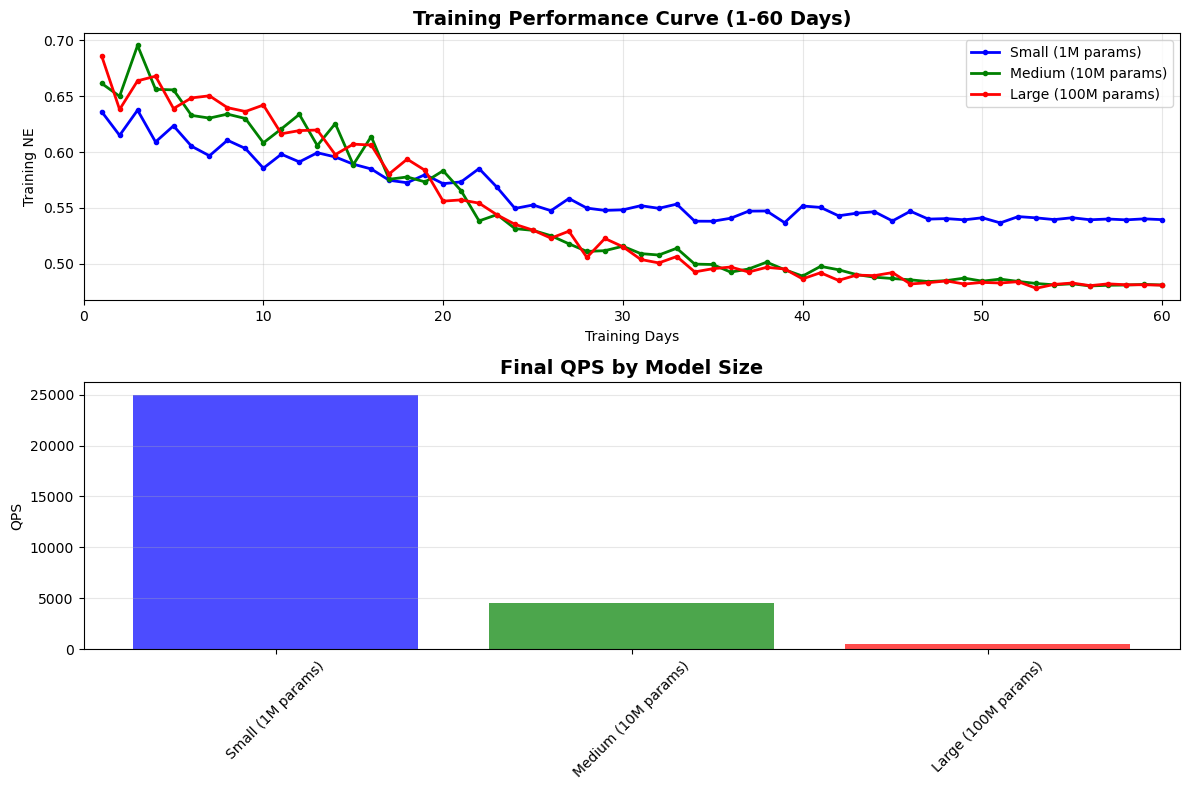

Training Performance Summary:
------------------------------------------------------------
Small (1M params):
  Day 1:  NE = 0.6363
  Day 60: NE = 0.5394, QPS = 25002
  Total Improvement: -15.2%
  Progress checkpoints:
    Day 10: NE = 0.5856
    Day 20: NE = 0.5717
    Day 30: NE = 0.5482
    Day 40: NE = 0.5517
    Day 50: NE = 0.5411

Medium (10M params):
  Day 1:  NE = 0.6616
  Day 60: NE = 0.4809, QPS = 4546
  Total Improvement: -27.3%
  Progress checkpoints:
    Day 10: NE = 0.6083
    Day 20: NE = 0.5833
    Day 30: NE = 0.5156
    Day 40: NE = 0.4888
    Day 50: NE = 0.4843

Large (100M params):
  Day 1:  NE = 0.6863
  Day 60: NE = 0.4807, QPS = 500
  Total Improvement: -30.0%
  Progress checkpoints:
    Day 10: NE = 0.6421
    Day 20: NE = 0.5560
    Day 30: NE = 0.5152
    Day 40: NE = 0.4863
    Day 50: NE = 0.4832

Budget used per model: 0.0 GPU-days
Total budget available: 8000 GPU-days


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Import the ModelPerformanceAPI (adjust path as needed for your notebook)
from model_performance_api import ModelPerformanceAPI

# Create API instance
api = ModelPerformanceAPI()

# Define different model sizes to compare
model_configs = [
    {"name": "Small (1M params)", "params_millions": 1.0, "color": "blue"},
    {"name": "Medium (10M params)", "params_millions": 10.0, "color": "green"},
    {"name": "Large (100M params)", "params_millions": 100.0, "color": "red"},
]

# Training days
max_training_days = 60

# Create the plot
plt.figure(figsize=(12, 8))

results_data = []

for config in model_configs:
    # Reset budget for each model to avoid budget exceeded errors
    api.reset_budget()

    # Train model for 60 days and get the full curve
    final_training_ne, final_qps, curve = api.train_model(
        training_days=max_training_days,
        params_millions=config["params_millions"],
        ignore_budget=True  # Ignore budget for plotting purposes
    )

    # Extract training days and performance values from curve
    training_days = list(curve.keys())
    training_ne_values = list(curve.values())

    # Store results for summary
    results_data.append({
        'config': config,
        'final_ne': final_training_ne,
        'final_qps': final_qps,
        'curve': curve
    })

    # Plot training curve
    plt.subplot(2, 1, 1)
    plt.plot(training_days, training_ne_values,
             label=config["name"], color=config["color"], linewidth=2, marker='o', markersize=3)

# Plot QPS for comparison (single point since QPS doesn't change with training)
plt.subplot(2, 1, 2)
for result in results_data:
    config = result['config']
    qps = result['final_qps']
    plt.bar(config["name"], qps, color=config["color"], alpha=0.7)

# Format the plots
plt.subplot(2, 1, 1)
plt.title("Training Performance Curve (1-60 Days)", fontsize=14, fontweight='bold')
plt.xlabel("Training Days")
plt.ylabel("Training NE")
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, max_training_days + 1)

plt.subplot(2, 1, 2)
plt.title("Final QPS by Model Size", fontsize=14, fontweight='bold')
plt.ylabel("QPS")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("Training Performance Summary:")
print("-" * 60)
for result in results_data:
    config = result['config']
    curve = result['curve']

    day_1_ne = curve[1]
    final_ne = result['final_ne']
    final_qps = result['final_qps']

    print(f"{config['name']}:")
    print(f"  Day 1:  NE = {day_1_ne:.4f}")
    print(f"  Day {max_training_days}: NE = {final_ne:.4f}, QPS = {final_qps:.0f}")

    if day_1_ne > 0:
        improvement = ((final_ne - day_1_ne) / day_1_ne) * 100
        print(f"  Total Improvement: {improvement:.1f}%")

    # Show some intermediate points
    checkpoints = [10, 20, 30, 40, 50]
    print("  Progress checkpoints:")
    for day in checkpoints:
        if day in curve and day <= max_training_days:
            print(f"    Day {day}: NE = {curve[day]:.4f}")
    print()

# Print budget information
print(f"Budget used per model: {api.get_spent_budget():.1f} GPU-days")
print(f"Total budget available: {api.model_config_dict['TOTAL_BUDGET_GPU_DAYS']} GPU-days")
